# neural_network
### DIY neural network from "Make Your Own Neural Network" by Tariq Rashid
In this notebook I experiment how to put together the building blocks and succeed in making a functional neural network that could accurately identify handwritten digits from external images, after being trained on the complete MNIST dataset. 

In [339]:
import neuralNetwork as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Required initialization variables
A neural network's shape is defined by an **input layer**, a **hidden layer** and an **output layer**, and their respective **nodes**.
The amount of nodes is previously selected to build the network's structure.

In [340]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = nn.neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [341]:
# import the training data set
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

### Inspecting MNIST samples
Quickly plot a couple of examples from the small training subset to confirm the CSV rows reshape cleanly into 28x28 grayscale digits.


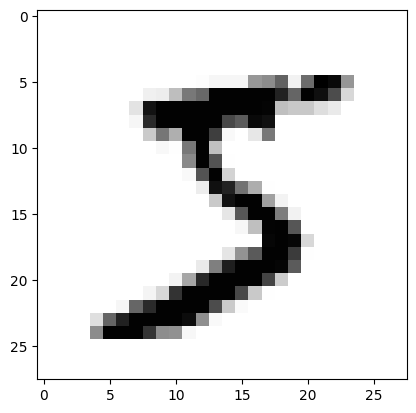

In [342]:
# example of visualizing the first entry in the dataset
all_values = data_list[0].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

3


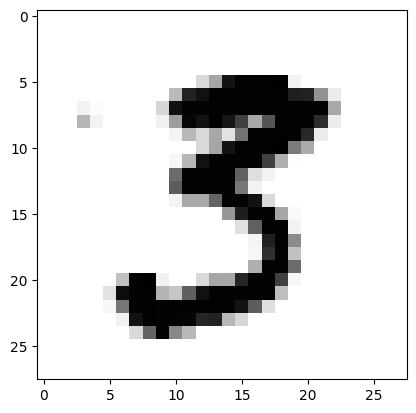

In [343]:
# example of visualizing the 50th entry in the dataset
all_values = data_list[49].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
print(data_list[49][0])

In [344]:
# The input values are normalized between 0.01 and 1.0 so the neural network avoids saturation. 255 is the range of pixel values.
scaled_input = (np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01

After preparing the data, the neural network is also prepared to train on it.

In [ ]:
# Modify the variables of the neural network and prepare it to be trained with the MNIST dataset
input_nodes = 784 # 28x28 pixels
hidden_nodes = 500 # amount of patterns or features to be learned
output_nodes = 10 # digits 0-9
learning_rate = 0.1

n = nn.neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

### Training on the full dataset
Load the complete MNIST training CSV and iterate for multiple epochs using normalized inputs and one-hot targets (0.99 for the true class, 0.01 elsewhere).


In [347]:
# load complete MNIST training data csv into a list
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [348]:
# train the network
epochs = 7
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asarray(all_values[1:], dtype=float)/255 * 0.99) + 0.01 # normalized input values
        targets = np.zeros(output_nodes) + 0.01 # target output values
        targets[int(all_values[0])] = 0.99 # record selection
        n.train(inputs, targets)

### Evaluating on the MNIST test set
Run the held-out test rows through the trained network, collect a scorecard of correct predictions, and compute overall performance.


In [349]:
# load the MNIST test data csv file into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [ ]:
# Turn all the values (label and image data) into a list and then check the first record from the test data set
all_values = test_data_list[0].split(',')
print(all_values[0])

7


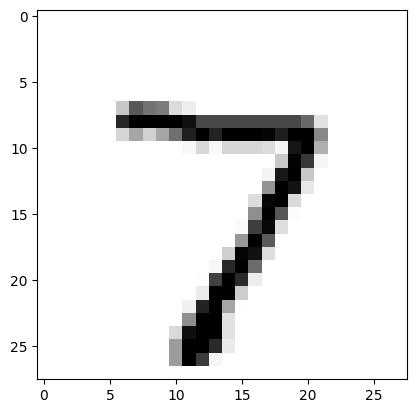

In [356]:
# convert the image data to an array and reshape it to 28x28 pixels for digit visualization
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [357]:
# query the trained network to compare the output values to the labeled data
n.query((np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01)
# notice how the index corresponding to number 7 is larger than the other indices

array([[0.00407691],
       [0.01374255],
       [0.00673188],
       [0.00322299],
       [0.00670146],
       [0.01115807],
       [0.00638087],
       [0.98086939],
       [0.00599758],
       [0.00482727]])

In [410]:
# Loop through every record in the test data set, query the network and store the results in a scorecard
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    # print(correct_label, "correct label")
    inputs = (np.asarray(all_values[1:], dtype=float)/255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    # print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

In [411]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [412]:
# Calculate the performance score, which is the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.9738


### Using the trained network to recognize my own handwritten digits

#### Preparing custom digit images
I wrote all 0-9 digits in a piece of paper and took pictures of them with my phone. The pictures were scaled to (28x28 px) and formmated to PNGs. Then they were inverted in color and normalized into the same 0.01-1.0 range as MNIST so the trained network could see comparable input distributions.


In [415]:
# Load our own fixed images
import imageio.v3
import glob
own_dataset = []
for image in sorted(glob.glob("my_num/*.png")):
    label = int(image[7])
    print("loading...", image)
    img_array = imageio.v3.imread(image, mode='F') # load image as float array
    # invert colors and 
    img_data = 255.0 - img_array.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print("min:", np.min(img_data), "max: ",np.max(img_data)) # check for image contrast with the data range
    record = np.append(label, img_data) # create record in the same format as MNIST data
    own_dataset.append(record)


loading... my_num/0.png
min: 0.01 max:  1.0
loading... my_num/1.png
min: 0.01 max:  0.9844706
loading... my_num/2.png
min: 0.01 max:  1.0
loading... my_num/3.png
min: 0.01 max:  1.0
loading... my_num/4.png
min: 0.01 max:  1.0
loading... my_num/5.png
min: 0.01 max:  1.0
loading... my_num/6.png
min: 0.01 max:  1.0
loading... my_num/7.png
min: 0.01 max:  1.0
loading... my_num/8.png
min: 0.01 max:  1.0
loading... my_num/9.png
min: 0.01 max:  1.0


From now on, we can select any of the handwritten digits to test if it gets recognized by the network.

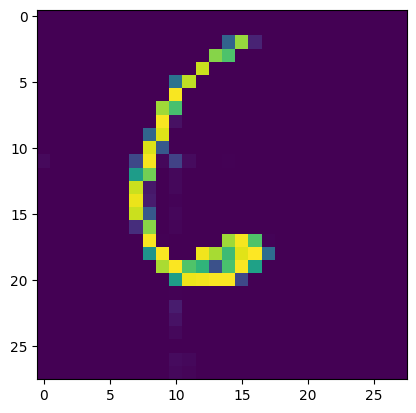

In [422]:
# Select item for testing
item = 6
plt.imshow(own_dataset[item][1:].reshape((28,28))) # visualize the data previous to querying the network

[[1.19028266e-03]
 [1.21326727e-03]
 [1.30280832e-01]
 [1.53681627e-04]
 [3.12376957e-03]
 [1.00891453e-02]
 [9.31132530e-01]
 [4.75547745e-03]
 [1.00491400e-03]
 [8.79294815e-04]]
network's answer = 6 correct label = 6
match!


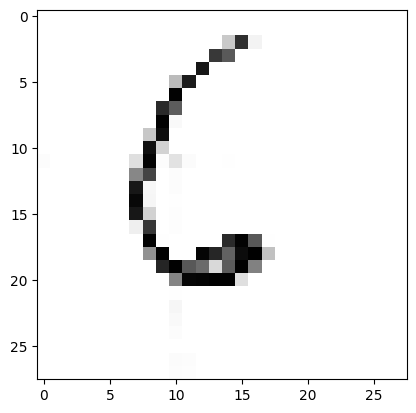

In [423]:
# Plot the data and query the network to test the outputs for the selected item
plt.imshow(own_dataset[item][1:].reshape(28, 28), cmap = 'Greys', interpolation='None')
correct_label = own_dataset[item][0]
inputs = own_dataset[item][1:]
outputs = n.query(inputs)
print(outputs)

label = np.argmax(outputs)
print("network's answer =", label, "correct label =", int(correct_label))
if (label == correct_label):
    print("match!")
else:
    print("no match!")

In [418]:
scorecard = []
for record in own_dataset:
    correct_label = int(record[0])
    print(correct_label, "correct label")
    inputs = record[1:]
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
0 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
2 network's answer
8 correct label
8 network's answer
9 correct label
4 network's answer


### Final scorecard and performance
After going over the processed custom samples, predictions are compared to their labels, and the performance is calculated.


In [424]:
print(scorecard)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 0]


In [425]:
# Calculate the performance score
scorecard_array = np.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.6


I intentionally wrote some poorly drawn digits (2, 5, 7, 9) to observe the behavior of the network, so the results of the predictions on them were expected.